In [2]:
import seaborn as sns
import pandas as pd

# Load the Titanic dataset from Seaborn
df= sns.load_dataset("titanic")

# Display the first few rows of the DataFrame
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:
df['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [4]:
survived_counts = df.groupby(['survived', 'sex']).size().reset_index(name='count')
survived_counts

,survived,sex,count
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


In [9]:
survived_data = df[titanic['survived'] == 1]

# Calculate value counts for Survived by Sex
survived_counts = survived_data['sex'].value_counts()
survived_counts

female    233
male      109
Name: sex, dtype: int64

In [10]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
survived_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


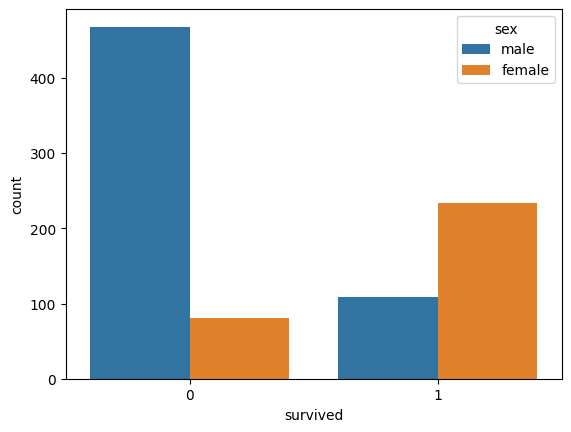

In [14]:
sns.countplot(x='survived', data=df, hue='sex');

In [25]:
total_female_count = df[df['sex'] == 'female'].shape[0]
total_female_count


314

In [19]:

female_survived_count = df[(df['sex'] == 'female') & (df['survived'] == 1)].shape[0]
total_female_count = df[df['sex'] == 'female'].shape[0]

female_survived_percent = (female_survived_count / total_female_count) * 100

print(f"Percentage of females who survived: {female_survived_percent:.2f}%")


Percentage of females who survived: 74.20%


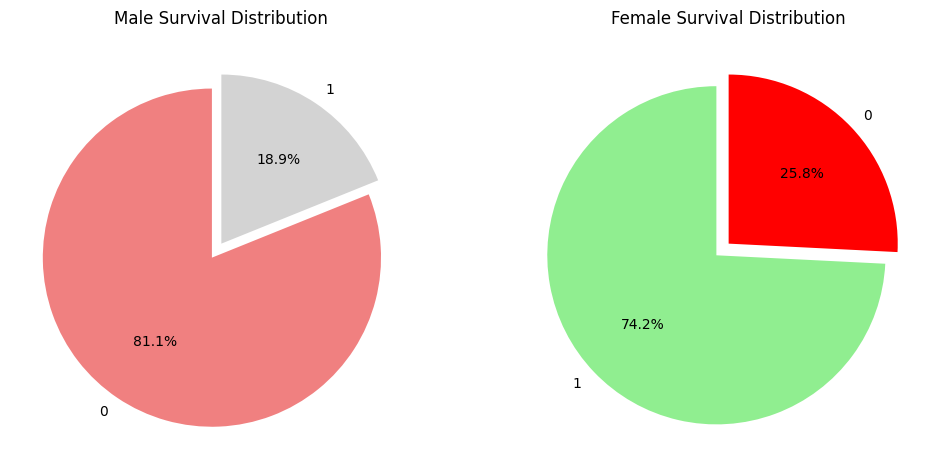

In [31]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot pie chart for male survival
male_survival_counts = df[df['sex'] == 'male']['survived'].value_counts()
explode_male = (0.1, 0)  # explode the first section
axes[0].pie(male_survival_counts, labels=male_survival_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgrey'], explode=explode_male)
axes[0].set_title('Male Survival Distribution')

# Plot pie chart for female survival
female_survival_counts = df[df['sex'] == 'female']['survived'].value_counts()
explode_female = (0.1, 0)  # explode the first section
axes[1].pie(female_survival_counts, labels=female_survival_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'red'], explode=explode_female)
axes[1].set_title('Female Survival Distribution')

plt.show()


In [35]:
pd.crosstab(df.pclass, df.survived, margins=True)

survived,0,1,All
pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [42]:
for i in range (3) :
  n=i+1
  pcs=df.survived[df.pclass == n].sum()/df[df.pclass == n].survived.count()
  print(pcs)



0.6296296296296297
0.47282608695652173
0.24236252545824846


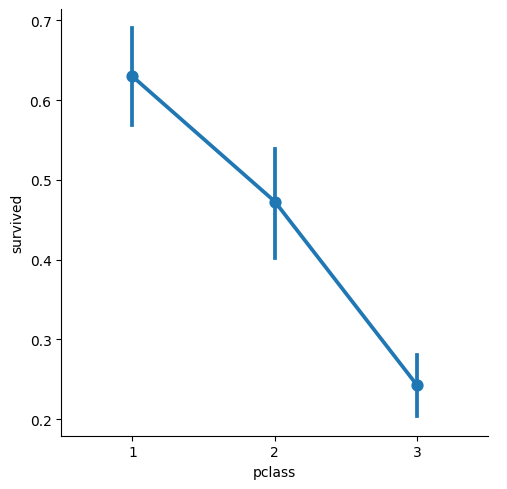

In [44]:
# Assuming 'df' is your DataFrame
sns.catplot(x='pclass', y='survived', kind='point', data=df)
plt.show()

In [45]:
#Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died

pd.crosstab([df.sex, df.survived], df.pclass, margins=True).style.background_gradient(cmap='autumn_r')

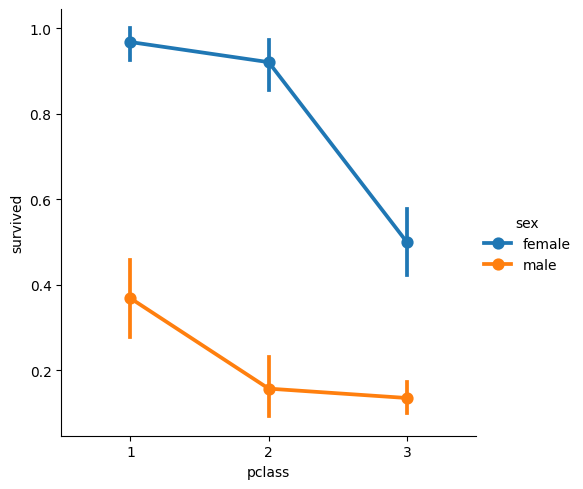

In [49]:
# Assuming 'df' is your DataFrame
sns.catplot(x='pclass', y='survived', hue='sex', kind='point', data=df)
plt.show()

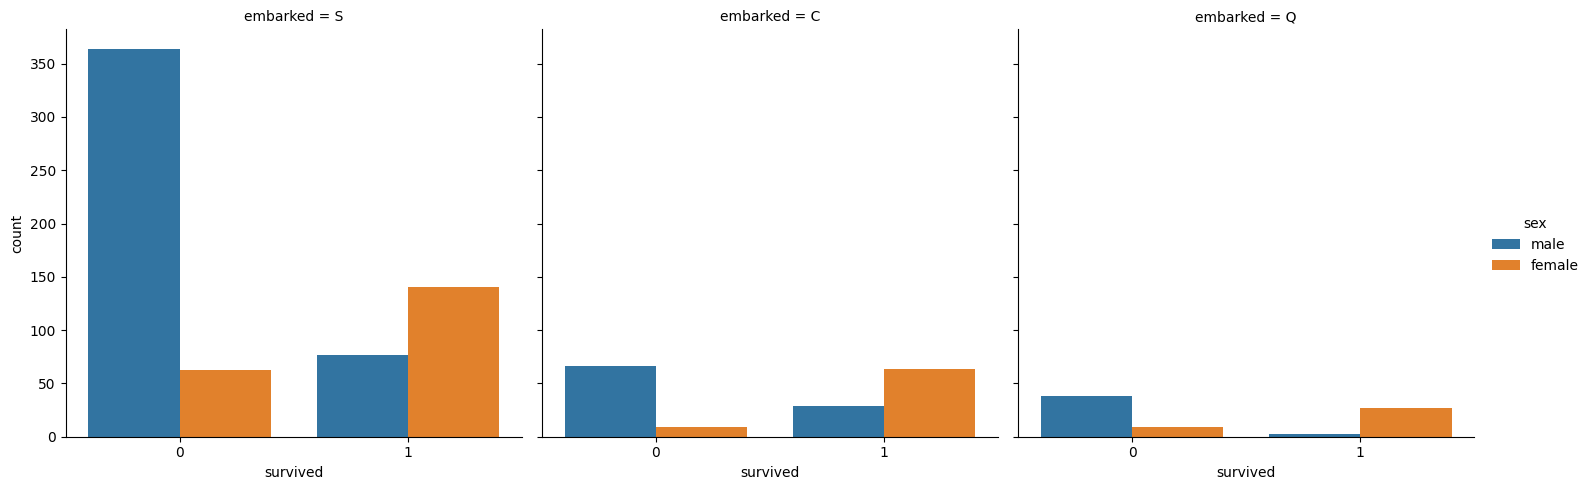

In [54]:
# Assuming 'df' is your DataFrame
sns.catplot(x='survived', col='embarked', hue='sex', kind='count', data=df)
plt.show()

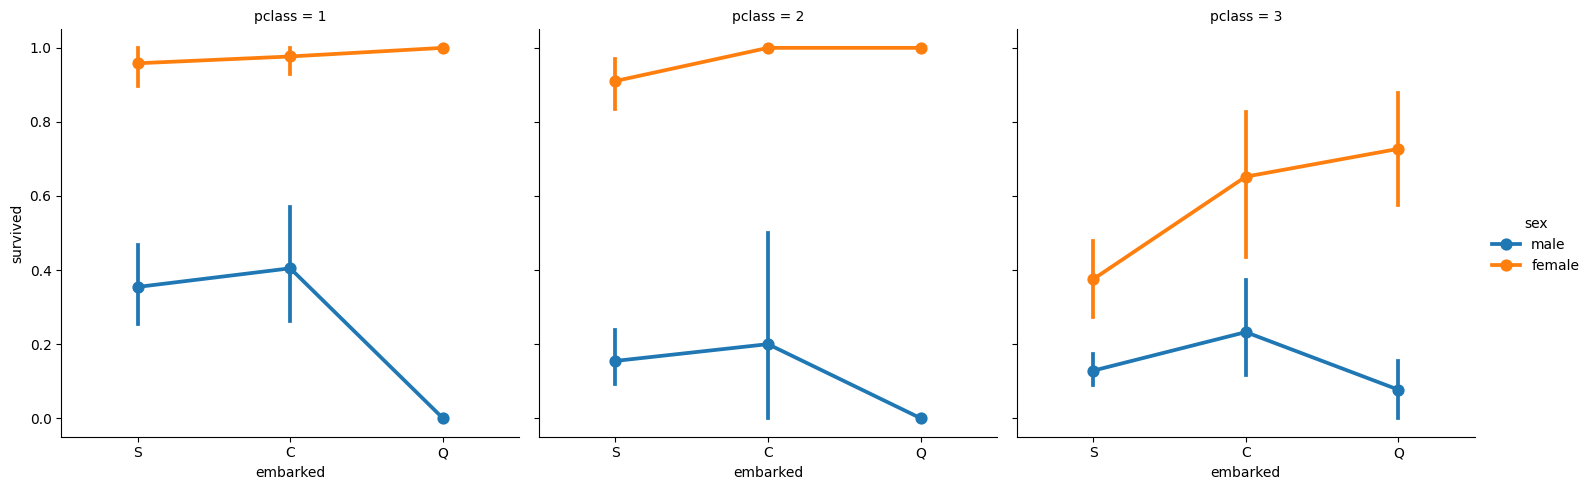

In [60]:
# Assuming 'df' is your DataFrame
sns.catplot(x='embarked', y='survived', col='pclass', hue='sex', kind='point', data=df)
plt.show()


<ipython-input-62-2684111c3d09>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare'])


<Axes: xlabel='fare', ylabel='Density'>

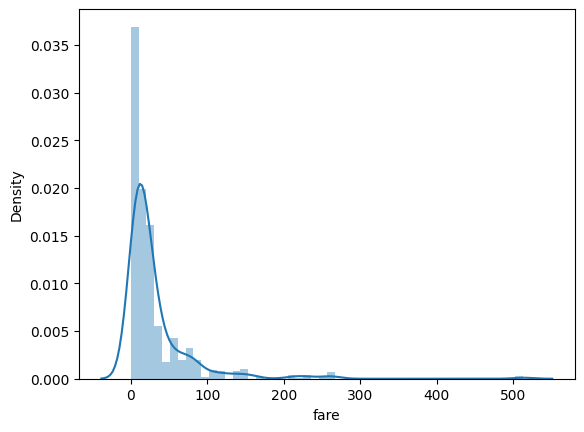

In [62]:
sns.distplot(df['fare'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [64]:
df['age'].isnull().sum()

177

In [65]:
#Perform data preprocessing

# Handle missing values (example: fill missing age values with the median)
df['age'].fillna(df['age'].median(), inplace=True)

In [66]:
# Encode categorical variables (example: convert 'sex' to numerical values)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [67]:
# Select features and target variable
X = df[['pclass', 'sex', 'age', 'fare']]  # Adjust features accordingly
y = df['survived']

In [68]:
X

,pclass,sex,age,fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
...,...,...,...,...
886,2,0,27.0,13.0000
887,1,1,19.0,30.0000
888,3,1,28.0,23.4500
889,1,0,26.0,30.0000


In [69]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Instantiate the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.8045
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [73]:
from sklearn.tree import DecisionTreeClassifier


df1 = pd.get_dummies(df, columns=['embarked'], prefix='embarked')

# Select features and target variable
X = df1[['pclass', 'sex', 'age', 'fare', 'embarked_C', 'embarked_Q', 'embarked_S']]  # Adjust features accordingly
y = df1['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.7598
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.69      0.77      0.73        74

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.76       179
weighted avg       0.77      0.76      0.76       179



In [74]:
df1

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,0,0,1
1,1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,1,0,0
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0,0,1
3,1,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,0,0,1
4,0,3,0,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,Second,man,True,NaN,Southampton,no,True,0,0,1
887,1,1,1,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True,0,0,1
888,0,3,1,28.0,1,2,23.4500,Third,woman,False,NaN,Southampton,no,False,0,0,1
889,1,1,0,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,1,0,0


In [75]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.7877
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       105
           1       0.73      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179



In [76]:
from sklearn.svm import SVC

# Instantiate the Support Vector Classification (SVC) model
model = SVC(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.6536
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179



In [77]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the K-NN classifier
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.7039
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.86      0.77       105
           1       0.71      0.49      0.58        74

    accuracy                           0.70       179
   macro avg       0.70      0.67      0.67       179
weighted avg       0.70      0.70      0.69       179



In [78]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Instantiate individual models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
svm_model = SVC(random_state=42)

# Create a Voting Classifier
voting_model = VotingClassifier(estimators=[('dt', dt_model), ('rf', rf_model), ('knn', knn_model), ('svm', svm_model)], voting='hard')

# Train the model
voting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.7318
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.93      0.80       105
           1       0.82      0.45      0.58        74

    accuracy                           0.73       179
   macro avg       0.77      0.69      0.69       179
weighted avg       0.75      0.73      0.71       179

